In [318]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [319]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [320]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [321]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [322]:
df_airline.dropna(axis=0,inplace=True)

In [323]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [324]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [325]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [326]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [327]:
df_airline.set_index('Month',inplace=True)

In [328]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

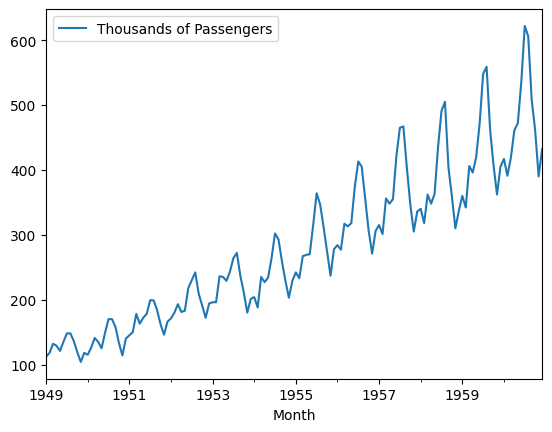

In [329]:
df_airline.plot()

In [330]:
from statsmodels.tsa.stattools import adfuller

In [331]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [332]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060482
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [333]:
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [334]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [335]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241699994
p- value: 0.0542132902838255
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [336]:
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [337]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468505
p- value: 2.7328918500142407e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [338]:
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [339]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514954
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [340]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

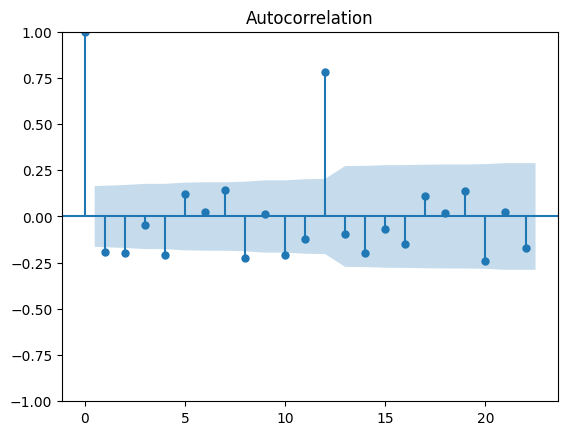

In [341]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

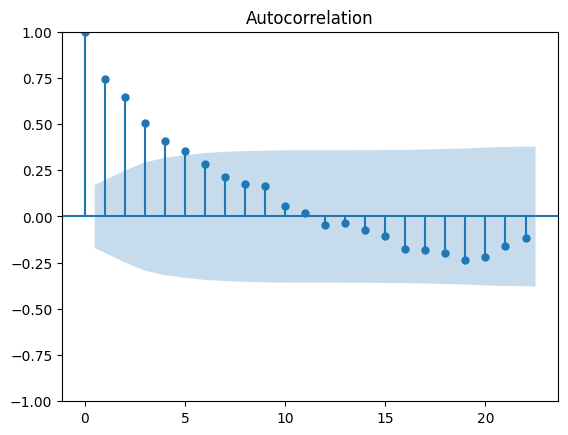

In [342]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())


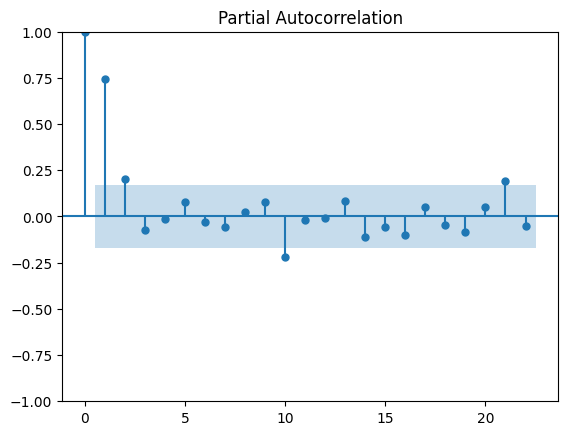

In [343]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [344]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [345]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [346]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [347]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [348]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [349]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [350]:
from statsmodels.tsa.arima.model import ARIMA

In [351]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(10,2,12))

c:\Users\SHREYAS\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\SHREYAS\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\SHREYAS\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [352]:
model_Arima_fit=model_ARIMA.fit()

c:\Users\SHREYAS\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\SHREYAS\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [353]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                    ARIMA(10, 2, 12)   Log Likelihood                -307.734
Date:                     Mon, 16 Dec 2024   AIC                            661.468
Time:                             12:50:04   BIC                            716.822
Sample:                         01-01-1949   HQIC                           683.692
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0468      0.115      0.408      0.683      -0.178       0.271
ar.L2         -1.0429      0.084    -12.481      0.000      -1.207      -0.879
ar.L3          0.0886      0.139      0.639      0.523      -0.183       0.361
ar.L4         -1.0260      0.131     -7.826      0.000      -1.283      -0.769
ar.L5          0.0658      0.155      0.424      0.672      -0.239       0.370
ar.L6         -0.9862      0.143     -6.885      0.000      -1.267      -0.705
ar.L7          0.0175      0.142      0.123      0.902      -0.261       0.296
ar.L8         -0.9822      0.122     -8.035      0.000      -1.222      -0.743
ar.L9         -0.0069      0.095     -0.072      0.942      -0.193       0.179
ar.L10        -0.9389      0.085    -11.102      0.000      -1.105      -0.773
ma.L1         -1.2855      0.254     -5.057      0.000      -1.784      -0.787
ma.L2          1.2393      0.359      3.456      0.001       0.536       1.942
ma.L3         -1.4417      0.437     -3.302      0.001      -2.297      -0.586
ma.L4          1.3764      0.507      2.714      0.007       0.382       2.370
ma.L5         -1.2167      0.575     -2.116      0.034      -2.344      -0.090
ma.L6          1.0832      0.660      1.640      0.101      -0.211       2.378
ma.L7         -1.0702      0.715     -1.497      0.134      -2.471       0.331
ma.L8          0.8861      0.819      1.082      0.279      -0.718       2.491
ma.L9         -0.7852      0.737     -1.066      0.286      -2.229       0.658
ma.L10         0.5229      0.601      0.870      0.384      -0.655       1.701
ma.L11        -0.4128      0.455     -0.908      0.364      -1.304       0.478
ma.L12         0.1335      0.273      0.489      0.625      -0.402       0.669
sigma2        77.2522     16.214      4.764      0.000      45.473     109.032
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.74
Prob(Q):                              0.99   Prob(JB):                         0.09
Heteroskedasticity (H):               2.12   Skew:                             0.59
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [354]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [355]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [356]:
pred

1956-01-01    283.252331
1956-02-01    269.529989
1956-03-01    295.199067
1956-04-01    298.598918
1956-05-01    299.104496
1956-06-01    345.358967
1956-07-01    388.480050
1956-08-01    371.885699
1956-09-01    340.086491
1956-10-01    302.889928
1956-11-01    271.792766
1956-12-01    302.622320
1957-01-01    311.084135
1957-02-01    293.820122
1957-03-01    316.983650
1957-04-01    324.532652
1957-05-01    326.111975
1957-06-01    372.707510
1957-07-01    414.546668
1957-08-01    396.545625
1957-09-01    365.288590
1957-10-01    332.207298
1957-11-01    302.485930
1957-12-01    329.444356
1958-01-01    338.545465
1958-02-01    318.410919
1958-03-01    338.978981
1958-04-01    350.540481
1958-05-01    353.245258
1958-06-01    399.582593
1958-07-01    440.478464
1958-08-01    421.285997
1958-09-01    390.659814
1958-10-01    361.553018
1958-11-01    333.134309
1958-12-01    356.270929
1959-01-01    365.690716
1959-02-01    343.273190
1959-03-01    361.217064
1959-04-01    376.582364


In [357]:
residuals

Month
1956-01-01      0.747669
1956-02-01      7.470011
1956-03-01     21.800933
1956-04-01     14.401082
1956-05-01     18.895504
1956-06-01     28.641033
1956-07-01     24.519950
1956-08-01     33.114301
1956-09-01     14.913509
1956-10-01      3.110072
1956-11-01     -0.792766
1956-12-01      3.377680
1957-01-01      3.915865
1957-02-01      7.179878
1957-03-01     39.016350
1957-04-01     23.467348
1957-05-01     28.888025
1957-06-01     49.292490
1957-07-01     50.453332
1957-08-01     70.454375
1957-09-01     38.711410
1957-10-01     14.792702
1957-11-01      2.514070
1957-12-01      6.555644
1958-01-01      1.454535
1958-02-01     -0.410919
1958-03-01     23.021019
1958-04-01     -2.540481
1958-05-01      9.754742
1958-06-01     35.417407
1958-07-01     50.521536
1958-08-01     83.714003
1958-09-01     13.340186
1958-10-01     -2.553018
1958-11-01    -23.134309
1958-12-01    -19.270929
1959-01-01     -5.690716
1959-02-01     -1.273190
1959-03-01     44.782936
1959-04-01     19.4

<Axes: ylabel='Density'>

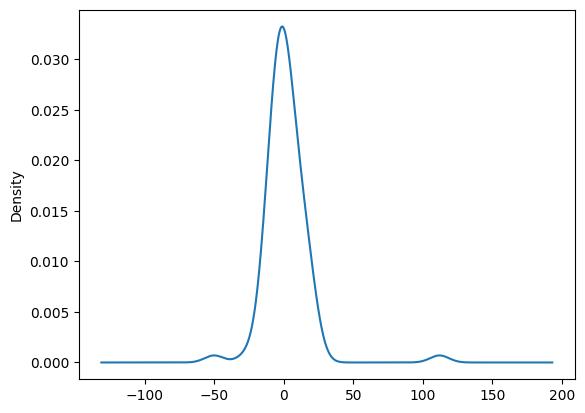

In [358]:
model_Arima_fit.resid.plot(kind='kde')

In [359]:
test_data['Predicted_ARIMA']=pred

C:\Users\SHREYAS\AppData\Local\Temp\ipykernel_20076\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

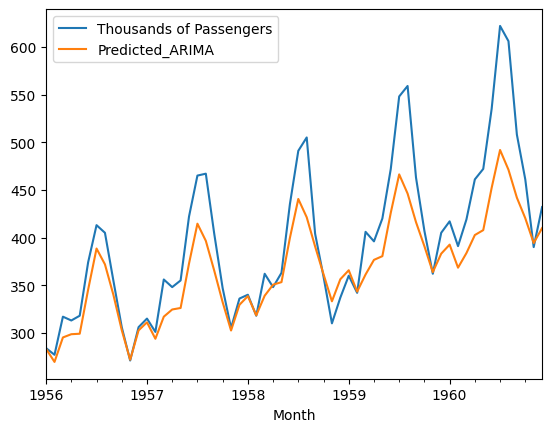

In [360]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()